## Predicting User Buying Behavior - Ecommerce  

### Starting with the basic functions - for Data Pre-processing
To start with our analytics we need some basic functions that we need to define in order to make things simpler e.g.
loading data, getting binary data etc. 

In [7]:
import numpy as np
import pandas as pd
import os



# normalize numerical columns
# one-hot categorical columns

def get_data():
    df = pd.read_csv('ecommerce_data.csv') # just need to change the data path, you're ready to go ! 

    

    # easier to work with numpy array
    data = df.as_matrix()

    X = data[:,:-1]
    Y = data[:,-1]

    # normalize columns 1 and 2
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

    # one-hot encoding
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

    # method 2
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # # assign: X2[:,-4:] = Z
    # assert(np.abs(X2[:,-4:] - Z).sum() < 1e-10)

    return X2, Y


def get_binary_data():
    # return only the data from the first 2 classes
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [5]:
import pandas as pd 
df11 = pd.read_csv('ecommerce_data.csv', sep=',')

In [19]:
df11.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


### Training Logistic Regression for Binary Classes 
i.e. only for classes 0 and 1 

0 0.486272766084 0.512584635332
1000 0.0497845010953 0.057283093727
2000 0.047660289095 0.0540991669305
3000 0.0471138611398 0.0532685837884
4000 0.0469419554378 0.0530072550592
5000 0.0468855239137 0.0529214375128
6000 0.0468667454209 0.0528928727845
7000 0.0468604671553 0.0528833214458
8000 0.0468583647073 0.0528801227536
9000 0.0468576602513 0.0528790509639
Final train classification_rate:  0.979865771812
Final test classification_rate:  0.97


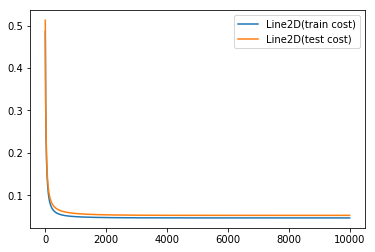

In [83]:
import numpy as np
from sklearn.utils import shuffle
X, Y = get_binary_data()
X, Y = shuffle(X, Y)
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

# randomly initialize weights
D = X.shape[1]
W = np.random.randn(D)
b = 0 # bias term

# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)
def predict1(P_Y_given_X):
    return np.argmax(P_Y_given_X)

P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)

train_costs = [] 
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum(axis=0)
    if i % 1000 == 0:
        print (i, ctrain, ctest)
print ("Final train classification_rate: ", classification_rate(Ytrain, np.round(pYtrain)))
print ("Final test classification_rate: ", classification_rate(Ytest, np.round(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()

### Training Logistic Regression Model (MultiClass)

0 0.768742810213 0.814728526347
1000 0.0875904137616 0.0949310533127
2000 0.0841250269716 0.0908553885976
3000 0.0828218842395 0.0894413653294
4000 0.0821661190885 0.0887794388722
5000 0.081784604238 0.0884128071631
6000 0.0815421549101 0.0881861142007
7000 0.0813786219571 0.0880342153066
8000 0.0812634702349 0.0879257368525
9000 0.0811796973448 0.0878440404056
Final train classification_rate:  0.925
Final test classification_rate:  0.88


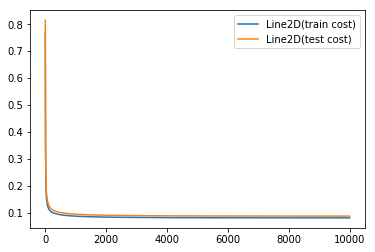

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

def y2indicator(y, K): 
    """ The function for creating binary categories for 
    logistic regression  """
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32) 
D = X.shape[1] ## D is no. of observations
K = len(set(Y)) ## K is our Classification categories 

# create train and test sets
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)
Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

# randomly initialize weights
W = np.random.randn(D, K)
b = np.zeros(K)

# make predictions
def softmax(a):
    """ Function for logits """
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W, b):
    """Function for calculating logits"""
    return softmax(X.dot(W) + b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))


# train loop
train_costs = [] 
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    if i % 1000 == 0:
        print (i, ctrain, ctest)

print ("Final train classification_rate: ", classification_rate(Ytrain, predict(pYtrain)))
print ("Final test classification_rate: ", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()

### Artificial Neural Network Training 

0 0.521735293729 0.522018729664
1000 0.0365795059557 0.0397280252696
2000 0.0291475907433 0.0257747857512
3000 0.0259883818893 0.0274175673362
4000 0.0241670628952 0.0285379702217
5000 0.02281318561 0.0306446554057
6000 0.0216772268342 0.031967240285
7000 0.0207251968191 0.0329781908237
8000 0.0199182939934 0.0338591325025
9000 0.019222373985 0.034675547089
Final train classification_rate: 0.98
Final test classification_rate: 0.94


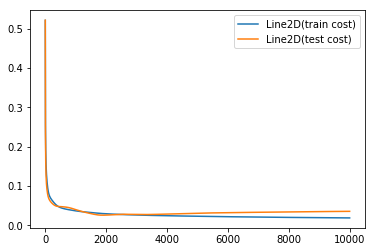

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
M = 5
D = X.shape[1]
K = len(set(Y))

# create train and test sets
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)
Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

# make predictions
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))


# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind)
    b2 -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain*Ztrain)
    W1 -= learning_rate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    if i % 1000 == 0:
        print (i, ctrain, ctest)

print ("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print ("Final test classification_rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()